In [1]:
# TODO, show how different aggression configurations impact results
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import Mirage, QiskitLevel3
from transpile_benchy.metrics.abc_metrics import MetricInterface
from transpile_benchy.metrics.gate_counts import DepthMetric
from mirror_gates.utilities import DoNothing

In [2]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../circuits/aggression_select.txt")
# library = CircuitLibrary.from_txt("../../circuits/small_circuits.txt")
# library = CircuitLibrary.from_txt("speedups.txt")

In [3]:
coupling_map = CouplingMap.from_heavy_hex(5)
transpilers = [
    QiskitLevel3(coupling_map),
    Mirage(coupling_map, name="Mirage-a0", fixed_aggression=0, no_vf2=True),
    Mirage(coupling_map, name="Mirage-a1", fixed_aggression=1, no_vf2=True),
    Mirage(coupling_map, name="Mirage-a2", fixed_aggression=2, no_vf2=True),
    Mirage(coupling_map, name="Mirage-a3", fixed_aggression=3, no_vf2=True),
]

metrics = [DepthMetric(consolidate=False)]

In [4]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers, circuit_library=library, metrics=metrics, num_runs=1
)
benchmark.run()

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:   0%|          | 0/4 [00:00<?, ?it/s]

Loading wstate_n27 from MQTBench


Circuits from library:  25%|██▌       | 1/4 [02:26<07:20, 146.85s/it]

Loading bigadder_n18 from QASMBench


Circuits from library:  50%|█████     | 2/4 [05:25<05:31, 165.80s/it]

Loading qft_n18 from QASMBench


Circuits from library:  75%|███████▌  | 3/4 [10:04<03:37, 217.53s/it]

Loading bv_n30 from QASMBench


Circuits from library: 100%|██████████| 4/4 [11:44<00:00, 176.07s/it]


In [5]:
print(benchmark.summary_statistics(transpilers[0], transpilers[1])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[2])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[3])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[4])["monodromy_depth"])

{'average_change': 11.215302808502333, 'aggregrate_change': 5.902192242833071, 'best_circuit': 'bv_n30', 'worst_circuit': 'wstate_n27'}
{'average_change': 19.67764878347988, 'aggregrate_change': -11.63575042158516, 'best_circuit': 'qft_n18', 'worst_circuit': 'wstate_n27'}
{'average_change': 19.98284999697453, 'aggregrate_change': -10.45531197301855, 'best_circuit': 'qft_n18', 'worst_circuit': 'wstate_n27'}
{'average_change': 1.3551030631924288, 'aggregrate_change': -10.1180438448567, 'best_circuit': 'bv_n30', 'worst_circuit': 'wstate_n27'}


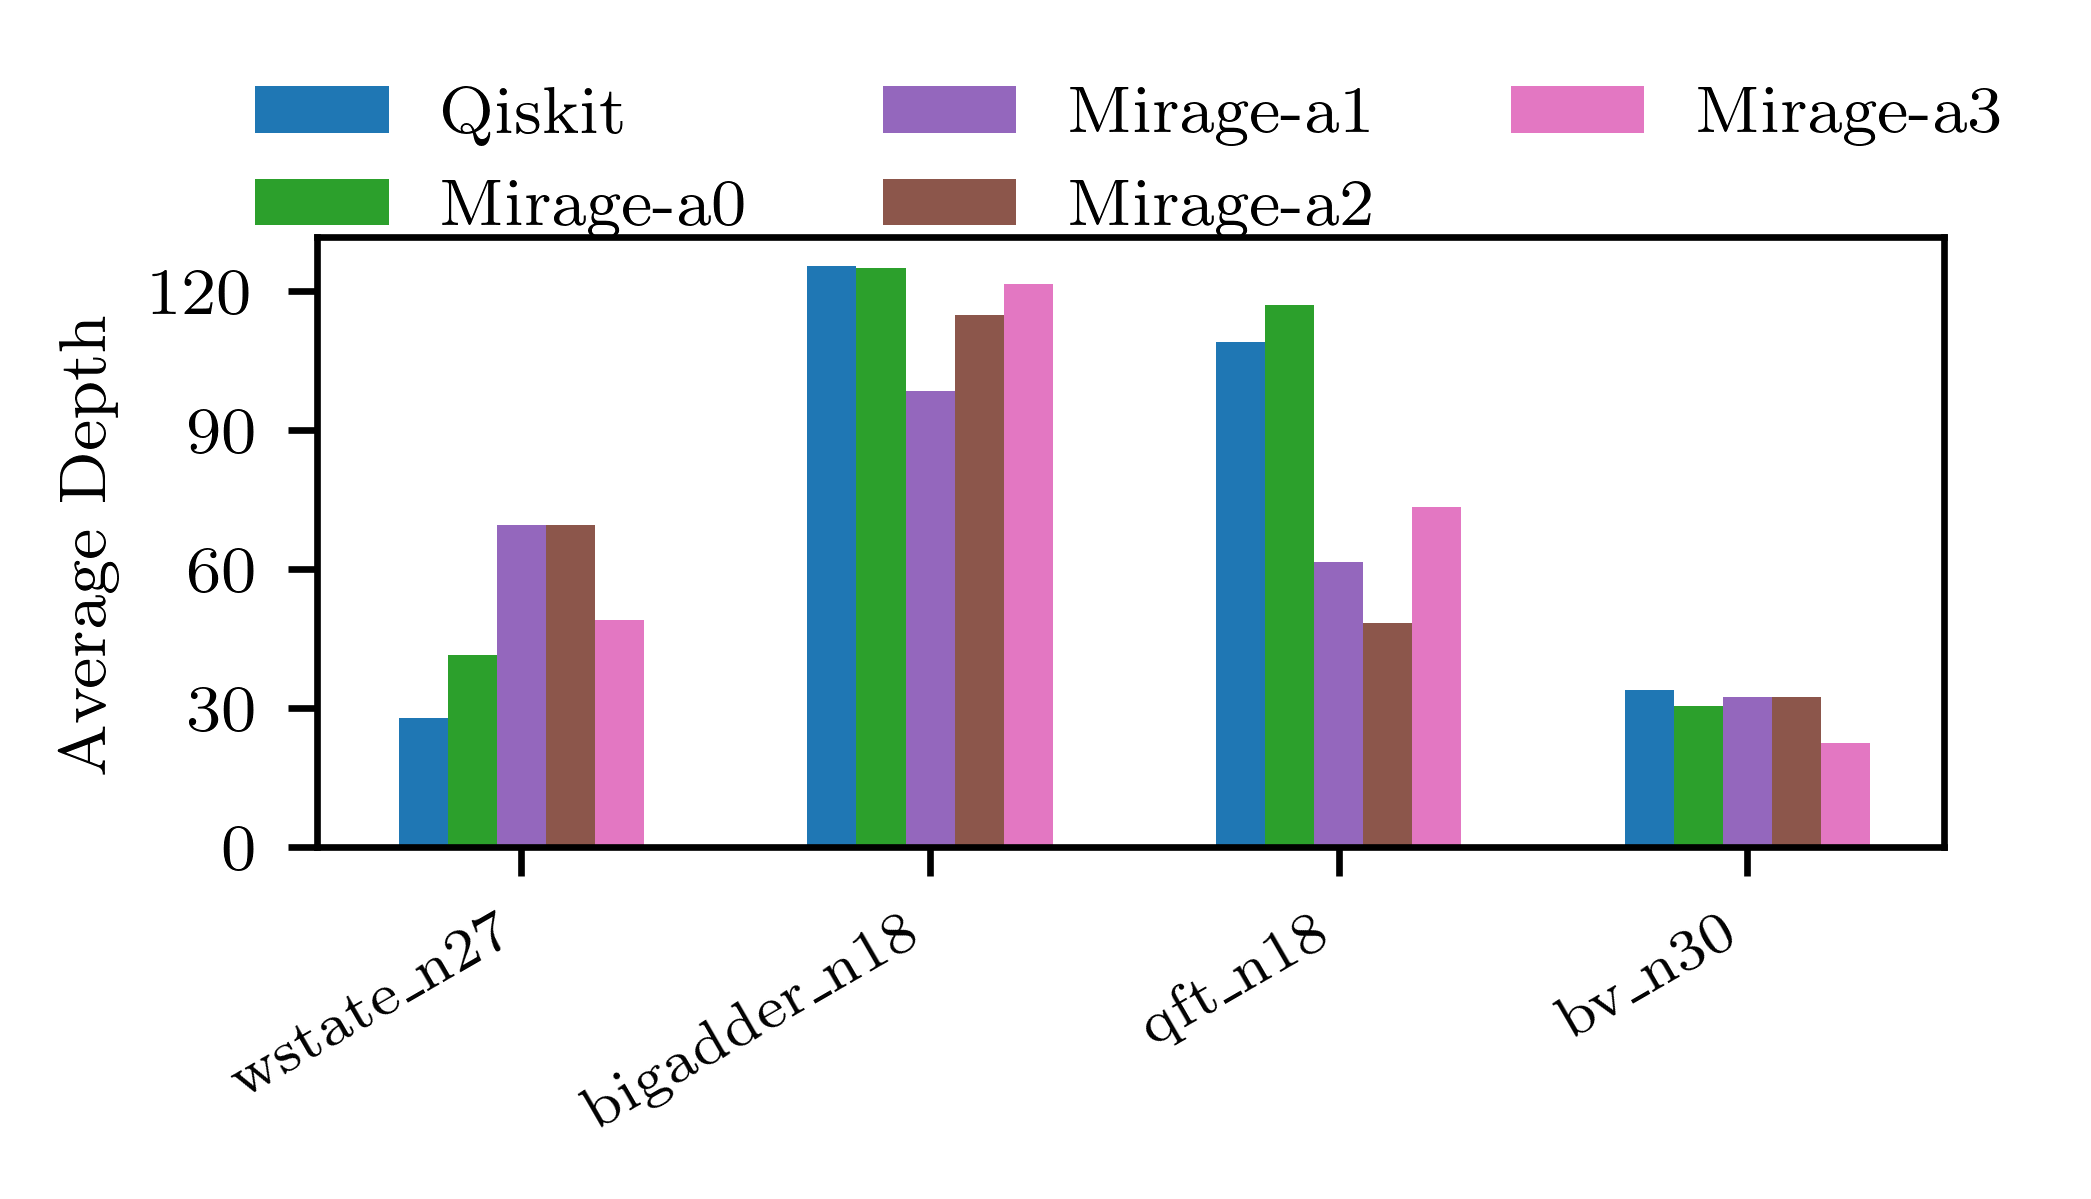

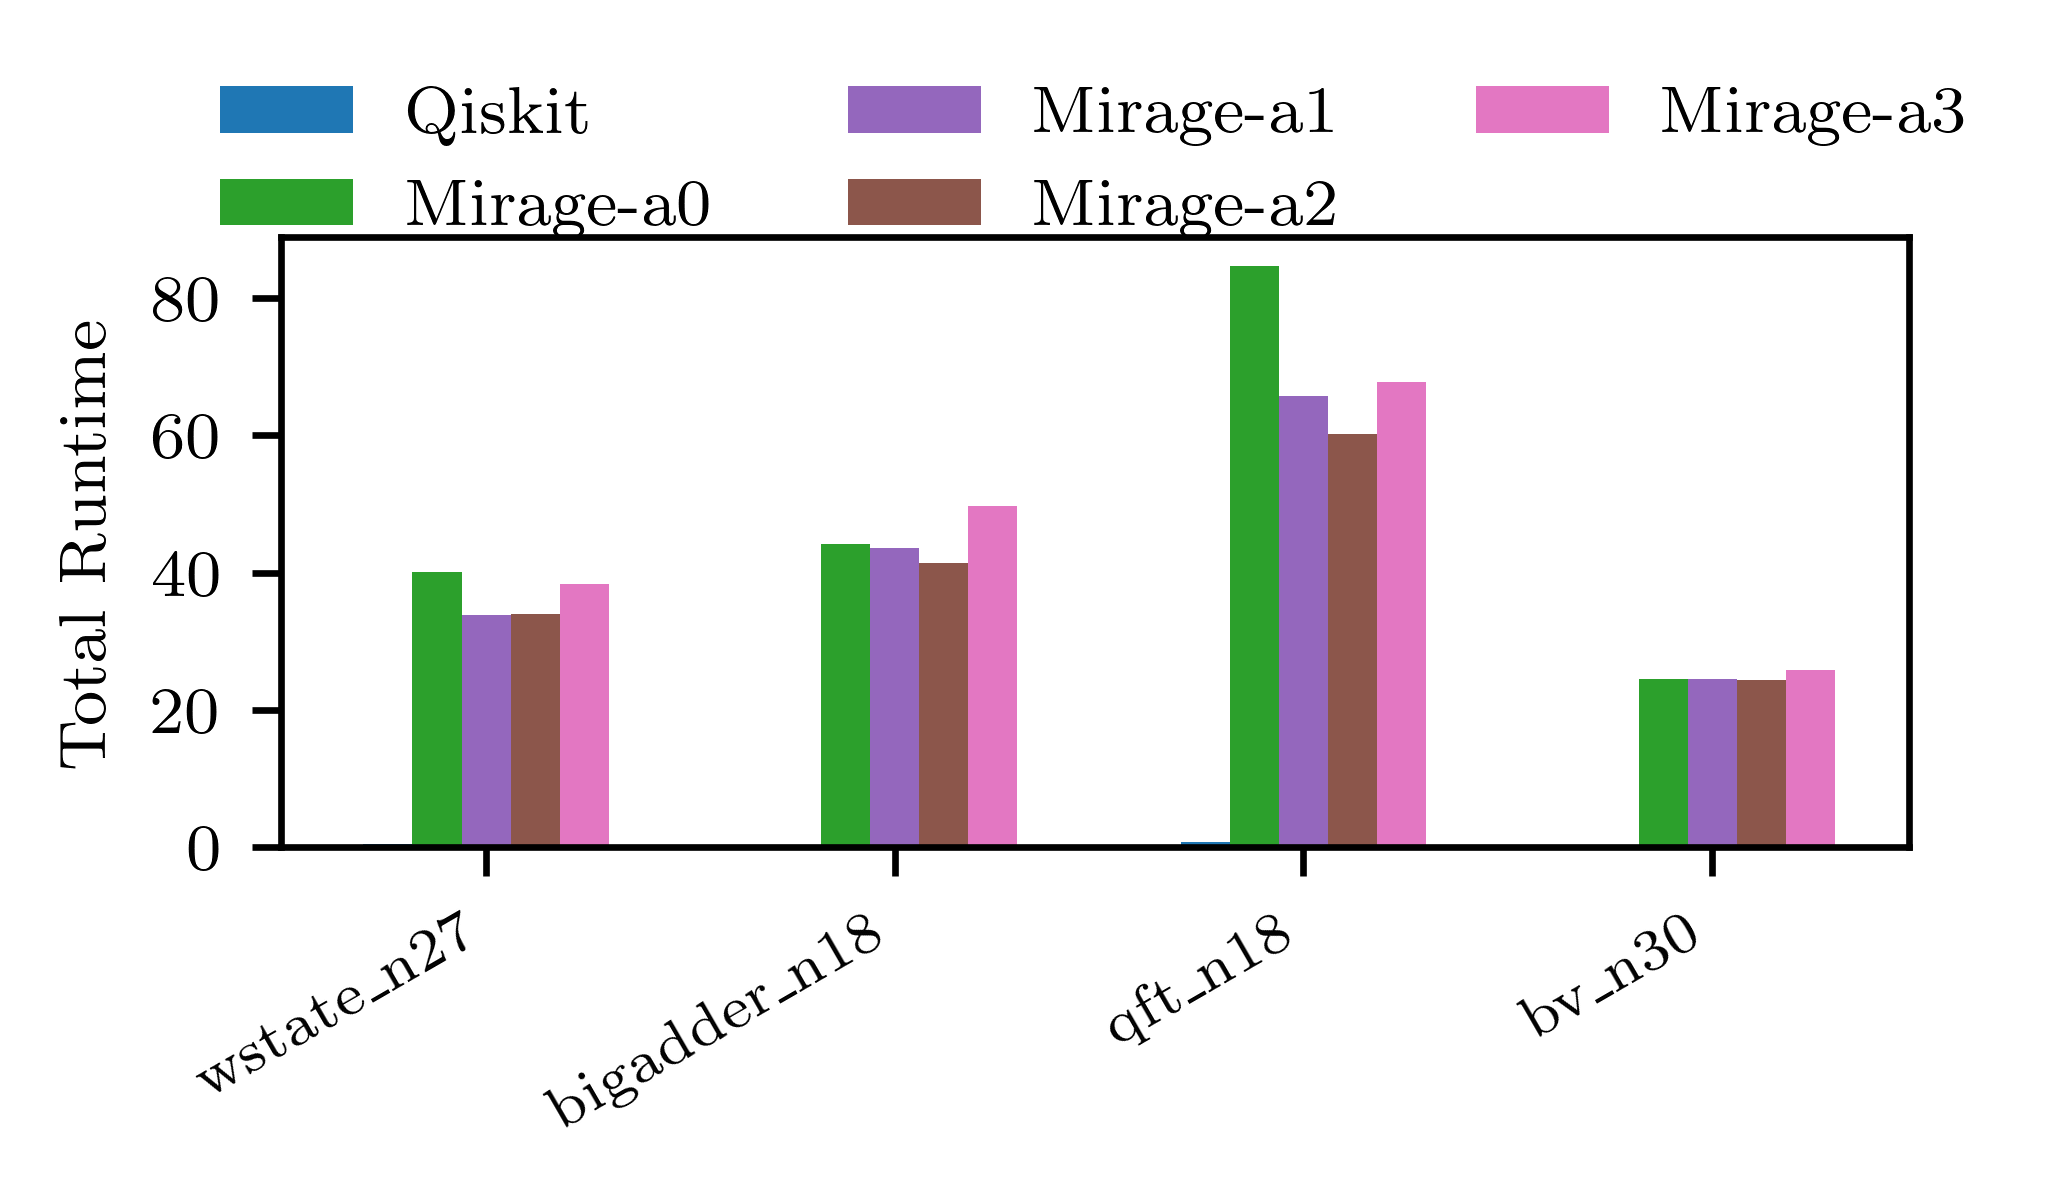

In [17]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(
    benchmark,
    save=0,
    legend_show=1,
    filename="aggression",
    color_override=[0, 2, 4, 5, 6],
    auto_sort=0,
    override_legend=["Qiskit", "Mirage-a0", "Mirage-a1", "Mirage-a2", "Mirage-a3"],
)